# Analyzing benchmarks of EARM 1.0 PySB model with microbench

## Background

[PySB](https://pysb.org) is a biochemical modeling framework for Python. Here, we analyze data from running simulations of a model ([Extrinsic apoptosis reaction model version 1.0](https://github.com/pysb/pysb/blob/master/pysb/examples/run_earm_1_0.py)) using an ODE integrator from the SciPy library. We examine the runtime across two different functions, and check that the environment (packages and their versions) are consistent across all runs, for reproducibility purposes.

## Load the data

In [1]:
%matplotlib inline

In [2]:
import pandas
import seaborn
import numpy

In [3]:
# Show up to 200 rows in a dataframe
pandas.set_option('display.max_rows', 200)

In [4]:
results = pandas.read_json('microbench-pysb.json', lines=True)

## Calculate mean runtime by function

In [5]:
# Calculate runtime for each run
results['runtime'] = results['finish_time'] - results['start_time']

# Average runtime by function name
print(results.groupby('function_name')['runtime'].mean(numeric_only=False))

function_name
fig_4a   0 days 00:00:04.563349400
fig_4b   0 days 00:00:00.266761400
Name: runtime, dtype: timedelta64[ns]


## Show mean runtime as a boxplot with whiskers

<AxesSubplot:xlabel='function_name', ylabel='runtime'>

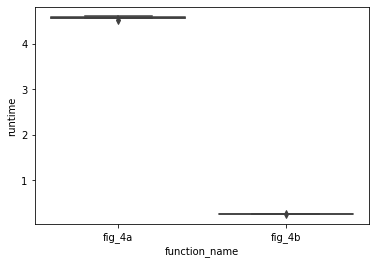

In [6]:
seaborn.boxplot(x=results['function_name'], y=results['runtime'].dt.total_seconds())

## Check conda environment consistency

We can quickly check if the conda environment was consistent across runs. We convert the conda_versions data (stored as dictionaries) to strings, and check that they're the same for every run:

In [7]:
len(results['conda_versions'].astype('str').unique()) == 1

True

We can also convert the package versions from a single run into a pandas dataframe:

In [8]:
pandas.DataFrame.from_dict(results['conda_versions'][0], orient='index', columns=['Version'])

,Version
appnope,0.1.2pypi_0
attrs,21.2.0pypi_0
backcall,0.2.0pypi_0
bionetgen,2.5.11
blas,1.0mkl
ca-certificates,2021.5.25hecd8cb5_1
certifi,2021.5.30py39hecd8cb5_0
coverage,5.5pypi_0
cycler,0.10.0pypi_0
debugpy,1.3.0pypi_0


Microbench provides a function, `envdiff`, to compare two environments together in a Jupyter Notebook, with differences highlighted in red (scroll to bottom in the following example). 

In [9]:
from microbench import envdiff
envdiff(results.iloc[0], results.iloc[1])

## Telemetry analysis
The function runs above contain a few telemetry points. Let's see how CPU and RAM usage changed over time in the first run.

In [10]:
run0_telem = pandas.DataFrame.from_dict(results.iloc[0].telemetry)
# Convert timestamps from str to datetime64
run0_telem['timestamp'] = pandas.to_datetime(run0_telem['timestamp'])
# Show the dataframe
run0_telem

,timestamp,process_cpu_percent,process_mem,sys_swap,sys_mem,cpu_freq_current,sys_cpu_percent
0,2021-06-30 20:31:32.884306,0.0,"[181669888, 5706682368, 73570, 2360, 152322048]","[0, 0, 0, 0.0, 14821355520, 30523392]","[34359738368, 14543343616, 57.7, 17957937152, ...",2900,12.6
1,2021-06-30 20:31:35.144748,0.0,"[193040384, 5707796480, 80923, 2360, 161890304]","[0, 0, 0, 0.0, 14821355520, 30523392]","[34359738368, 14608461824, 57.5, 17893371904, ...",2900,12.6
2,2021-06-30 20:31:37.381187,0.0,"[196317184, 5709893632, 91597, 2360, 167579648]","[0, 0, 0, 0.0, 14821621760, 30523392]","[34359738368, 14591455232, 57.5, 17909702656, ...",2900,3.3


In [11]:
# Calculate elapsed time for each entry
run0_telem['time_elapsed'] = run0_telem['timestamp'] - results.iloc[0]['start_time']

<AxesSubplot:xlabel='time_elapsed', ylabel='sys_cpu_percent'>

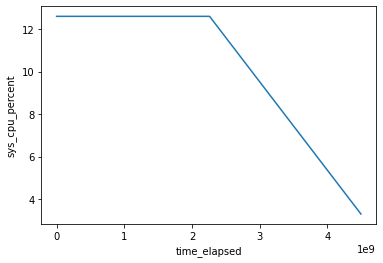

In [12]:
# Show system CPU percent utilization over time
seaborn.lineplot(data=run0_telem, y='sys_cpu_percent', x='time_elapsed')

<AxesSubplot:xlabel='time_elapsed', ylabel='process_rss_mem'>

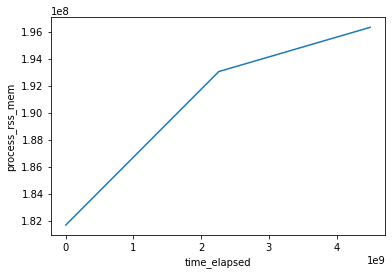

In [13]:
# Show resident set size (RSS) memory usage over time
run0_telem['process_rss_mem'] = run0_telem['process_mem'].apply(lambda x: x[0])
seaborn.lineplot(data=run0_telem, y='process_rss_mem', x='time_elapsed')

## Discussion
The above examples show how multiple functions can be benchmarked using microbench, and how different types of metadata can be captured. We also showed how to display telemetry data on a contrived example, but the same principles will apply to telemetry from longer-running functions

Microbench aims to make metadata capture easy, so that it can be collected routinely and used later if required for debugging, identifying reproducibility issues, and benchmarking.